### Question 1 : 

$$
K \left(x_N-\frac{L}{2} \right)^2+dx^2  \sum_{i=0}^{N} y_i^2
$$

$ K(x_N-\frac{L}{2})^2+dx^2 $ : Minimiser la distance entre le bout du tuyau et le parterre.

$ dx^2\sum_{i=0}^{N} y_i^2 $ : Minimiser l'encombrement du jardin en laissant le tuyau d'arrosage le plus proche possible du trajet en ligne droite entre le robinet et le pareterre

### Question 2 :  
Si on impose $ x_N = L/2 $ dès le début on devrait donner des conditions initiales vérifiant déjà cette condition. Ce qui n'est pas simple aux vues des autres conditions d'égalité.

### Question 3 : 

La courbure du tuyau au point $M$ appartenant à la courbe est donnée, par $ \frac{d^2\vec{M}}{dx^2} $ de norme au carré $ ||\frac{d^2\vec{M}}{dx^2}||^2 = \left( \frac{d^2x_M}{dx^2} \right)^2 + \left(\frac{d^2y_M}{dx^2} \right)^2 $ 

Si on se place maintenant au point $ (x_i, y_i) $ et qu'on se place dans le cas discret, donc on applique une méthode de différence finie on obtient :
$ ||\frac{d^2\vec{M}}{dx^2}|_{(x_i, y_i)}||^2 \approx (\frac{x_{i+1}-2x_{i}+x_{i-1}}{dx^2})^2 + (\frac{y_{i+1}-2y_{i}+y_{i-1}}{dx^2})^2 = \frac{(x_{i+1}-2x_{i}+x_{i-1})^2}{dx^4} + \frac{(y_{i+1}-2y_{i}+y_{i-1})^2}{dx^4}  $

Si on veut limiter cette courbure de telle sorte que $ ||\frac{d^2\vec{M}}{dx^2}|_{(x_i, y_i)}|| \le \gamma, \space \forall i \in [1,N] $ 

On trouve alors la condition :

$(x_{i+1}-2x_{i}+x_{i-1})^2 + (y_{i+1}-2y_{i}+y_{i-1})^2 \le dx^4 \gamma ^2, \space \forall i \in [1,N] $

### Question 4 : 

On pose $ z = (x_0, ..., x_N, y_0, ..., y_N) \in \mathbb{R}^{2N+2} $ 
On a 
$$
c_{eq}(z) = \begin{pmatrix} 
x_0 \\ y_0 \\ y_N \\ (x_1-x_0)^2 + (y_1-y_0)^2 - dx^2 \\ \vdots \\ (x_N-x_{N-1})^2 + (y_N-y_{N-1})^2 - dx^2 
\end{pmatrix} \in \mathbb{R}^{N+3}
$$
et
$$
c_{ineq}(z) = \begin{pmatrix} 
-y_1 \\ x_0-x_1 \\ \vdots \\ x_{N-1}-x_{N} \\ (x_{2}-2x_{1}+x_{0})^2 + (y_{2}-2y_{1}+y_{0})^2 - dx^4 \gamma ^2 \\ \vdots \\ (x_{N}-2x_{N-1}+x_{N-2})^2 + (y_{N}-2y_{N-1}+y_{N-2})^2 - dx^4 \gamma ^2 \end{pmatrix} \in \mathbb{R}^{2N}
$$

Ce qui représente au total N+3 condition d'égalité et 2N d'intégalité soit 3N+3 conditions.

et enfin :
$$
f(z) = K \left(x_N-\frac{L}{2} \right)^2+dx^2  \sum_{i=0}^{N} y_i^2
$$

### Question 5



### Question 6

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from casadi import *

In [2]:
def solve(N, K, L, gamma, z0) :
    
    dx = L/N
    
    opti = casadi.Opti()
    z = opti.variable(2*N+2)
    
    #bulding f
    S = 0
    for i in range(N+1) :
        S += z[N + 1 + i]**2

    f = K*(z[N] - L/2)**2 + S * dx**2
    opti.minimize(f)

    #ceq
    opti.subject_to(z[0] == 0)
    opti.subject_to(z[N+1] == 0)
    opti.subject_to(z[2*N+1] == 0)
    opti.subject_to((z[1] - z[0])**2 + (z[N+2] - z[N+1])**2 - dx**2 == 0)
    
    #cineq
    opti.subject_to( z[N+2] >= 0)
    opti.subject_to( z[0] - z[1] <= 0)
    
    for i in range(1,N) :
        
        #ceq(bis)
        opti.subject_to((z[i+1] - z[i])**2 + (z[N+2+i] - z[N+1+i])**2 - dx**2 == 0)
        
        #cineq(bis)
        opti.subject_to( z[i] - z[i+1] <= 0)
        opti.subject_to((z[i+1] - 2* z[i]+ z[i-1])**2 + (z[N+1 + i + 1] - 2* z[N+1 + i]+ z[N + 1])**2 - (dx**4)*(gamma**2) <= 0)
    
    #solving
    opti.set_initial(z, z0)
    opti.solver('ipopt')
    sol = opti.solve()
    return sol.value(z)
    

In [6]:
N = 60
K = 10**5
L = 10
gamma = 1

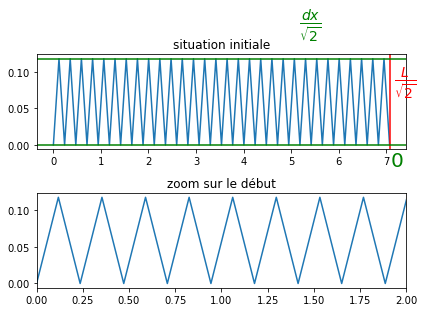

In [7]:
#setting z0 to isoceles triangles
z0 = np.arange(2 * N + 2, dtype = 'float64')
dx = L/N

#setting x_i
z0[:N+1] *= dx/np.sqrt(2)

#setting y_i
z0[N+1] = 0
z0[N+2::2] = dx/np.sqrt(2)
z0[N+3::2] = 0

#visualizat
fig = plt.figure()
sub1 = fig.add_subplot(211)
sub1.plot(z0[:N+1], z0[N+1:])
sub1.title.set_text('situation initiale')
sub1.axvline(x=L/np.sqrt(2), color = 'r')
plt.figtext(.92, .8, r"$ \frac{L}{\sqrt{2}} $", color = 'r', size = 20)
sub1.axhline(y=dx/np.sqrt(2), color = 'g')
plt.figtext(.7, 1, r"$ \frac{dx}{\sqrt{2}} $", color = 'g', size = 20)
sub1.axhline(y=0, color = 'g')
plt.figtext(.91, .52, r"$ 0 $", color = 'g', size = 20)


sub2 = fig.add_subplot(212)
sub2.plot(z0[:N+1], z0[N+1:])
plt.xlim(0,2)
sub2.title.set_text('zoom sur le début')

fig.tight_layout()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      119

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

(1.0, 2.0)

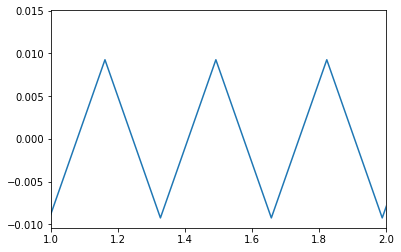

In [8]:
sol = solve(N, K, L, gamma, z0)
plt.plot(sol[:N+1], sol[N+1 : ])
plt.xlim(1,2)

In [9]:
sol

array([-1.15893987e-35,  1.66409563e-01,  3.32044818e-01,  4.97679470e-01,
        6.63314121e-01,  8.28948773e-01,  9.94583424e-01,  1.16021808e+00,
        1.32585273e+00,  1.49148738e+00,  1.65712203e+00,  1.82275668e+00,
        1.98839133e+00,  2.15402599e+00,  2.31966064e+00,  2.48529529e+00,
        2.65092994e+00,  2.81656459e+00,  2.98219924e+00,  3.14783390e+00,
        3.31346855e+00,  3.47910320e+00,  3.64473785e+00,  3.81037250e+00,
        3.97600715e+00,  4.14164180e+00,  4.30727646e+00,  4.47291111e+00,
        4.63854576e+00,  4.80418041e+00,  4.96981506e+00,  5.13544971e+00,
        5.30108437e+00,  5.46671902e+00,  5.63235367e+00,  5.79798832e+00,
        5.96362297e+00,  6.12925762e+00,  6.29489228e+00,  6.46052693e+00,
        6.62616158e+00,  6.79179623e+00,  6.95743088e+00,  7.12306553e+00,
        7.28870019e+00,  7.45433483e+00,  7.61996951e+00,  7.78560410e+00,
        7.95123888e+00,  8.11687327e+00,  8.28250843e+00,  8.44814207e+00,
        8.61377874e+00,  